In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [2]:
df = pd.read_excel (r"../Project1 Working/Book.xlsx", index_col="Country Name")
df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,4.610634e+12,4.821441e+12,5.010653e+12,5.215578e+12,5.515624e+12,5.818843e+12,6.083839e+12,6.441710e+12,6.920498e+12,7.273687e+12,...,1.698858e+13,1.777184e+13,1.860607e+13,1.949355e+13,2.031030e+13,2.116328e+13,2.202916e+13,2.307768e+13,2.404002e+13,2.494473e+13
Europe & Central Asia,1.162316e+13,1.168270e+13,1.179325e+13,1.201923e+13,1.233933e+13,1.268005e+13,1.303132e+13,1.342920e+13,1.399150e+13,1.448845e+13,...,2.095923e+13,2.146323e+13,2.153157e+13,2.172539e+13,2.212354e+13,2.258278e+13,2.301664e+13,2.365531e+13,2.416814e+13,2.453180e+13
European Union,8.037742e+12,8.078099e+12,8.144008e+12,8.261338e+12,8.466644e+12,8.665661e+12,8.889776e+12,9.114453e+12,9.494393e+12,9.866972e+12,...,1.454039e+13,1.480797e+13,1.469796e+13,1.468951e+13,1.492192e+13,1.527357e+13,1.558674e+13,1.601169e+13,1.635542e+13,1.660450e+13
Latin America & Caribbean,2.491509e+12,2.501017e+12,2.490058e+12,2.427307e+12,2.519847e+12,2.611752e+12,2.729115e+12,2.820882e+12,2.850012e+12,2.888749e+12,...,5.348215e+12,5.581710e+12,5.737113e+12,5.896884e+12,5.955304e+12,5.960669e+12,5.940599e+12,6.045888e+12,6.140871e+12,6.191944e+12
Middle East & North Africa,1.096173e+12,1.112135e+12,1.090403e+12,1.061780e+12,1.049167e+12,1.042661e+12,1.052692e+12,1.054766e+12,1.087020e+12,1.117554e+12,...,2.766778e+12,2.868623e+12,2.980196e+12,3.060890e+12,3.149823e+12,3.224644e+12,3.384665e+12,3.442755e+12,3.524700e+12,3.588456e+12


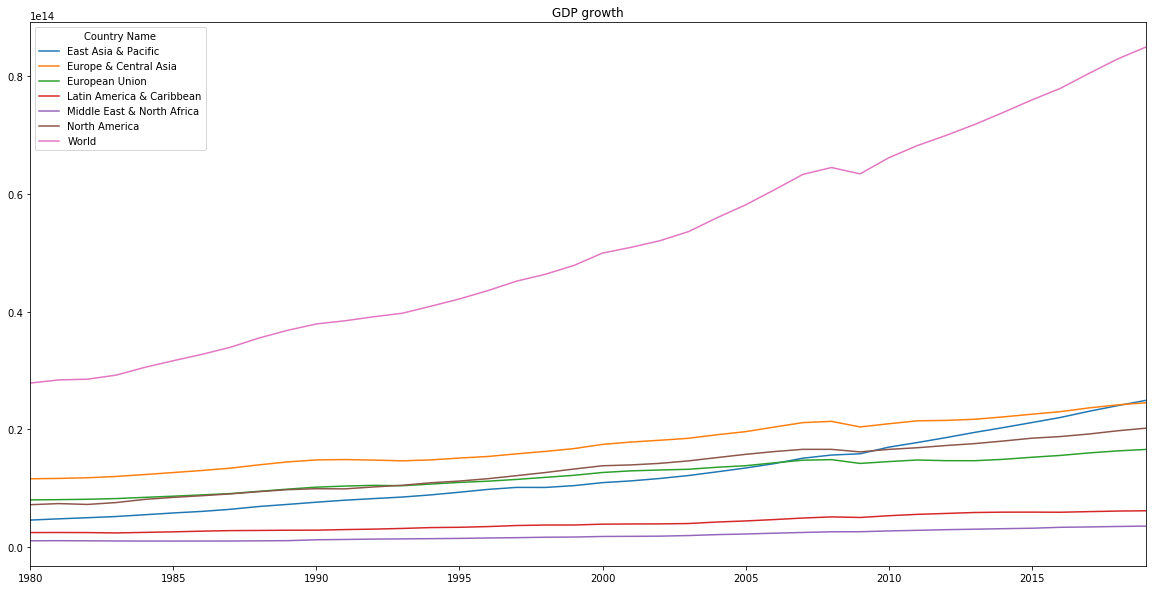

In [16]:
yearly_GDP = df.T
yearly_GDP.head()

yearly_GDP.plot(figsize=(20, 10), title="GDP growth")

In [18]:
GDP_pct_change = yearly_GDP.pct_change(fill_method='ffill')
GDP_pct_change.head()

Country Name,East Asia & Pacific,Europe & Central Asia,European Union,Latin America & Caribbean,Middle East & North Africa,North America,World
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,0.045722,0.005123,0.005021,0.003816,0.014561,0.026310,0.019217
1982,0.039244,0.009463,0.008159,-0.004382,-0.019541,-0.019436,0.004322
1983,0.040898,0.019162,0.014407,-0.025201,-0.026250,0.043860,0.024131
1984,0.057529,0.026632,0.024851,0.038125,-0.011879,0.071041,0.045019


In [5]:
GDP_growth = GDP_pct_change.dropna()
GDP_growth.head()

Country Name,East Asia & Pacific,Europe & Central Asia,European Union,Latin America & Caribbean,Middle East & North Africa,North America,World
1981,0.045722,0.005123,0.005021,0.003816,0.014561,0.026310,0.019217
1982,0.039244,0.009463,0.008159,-0.004382,-0.019541,-0.019436,0.004322
1983,0.040898,0.019162,0.014407,-0.025201,-0.026250,0.043860,0.024131
1984,0.057529,0.026632,0.024851,0.038125,-0.011879,0.071041,0.045019
1985,0.054975,0.027612,0.023506,0.036473,-0.006201,0.042219,0.037107


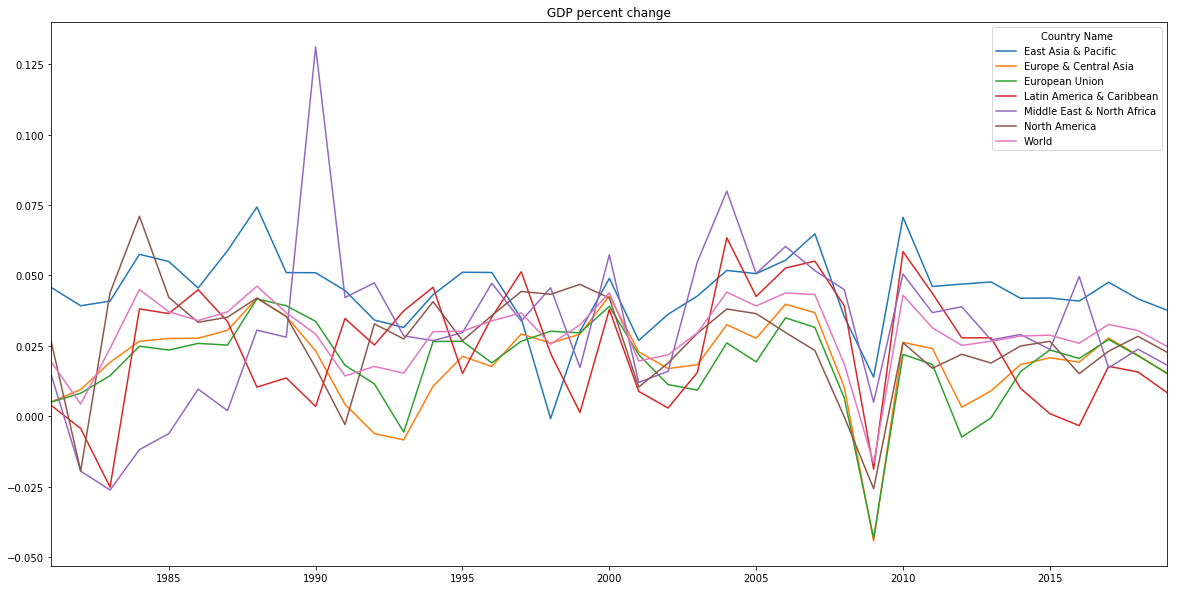

In [6]:
GDP_growth.plot(figsize=(20, 10), title="GDP percent change")

In [7]:
Emissions_df = pd.read_excel (r"../Project1 Working/Greenhouse_Emissions1.xlsx", index_col="Country Name")
Emissions_df.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Name,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,6.918674e+06,6.608208e+06,8.611438e+06,8.075198e+06,7.284011e+06,7.245164e+06,7.910650e+06,8.925836e+06,8.221051e+06,8.223285e+06,...,1.189064e+07,1.353511e+07,1.388218e+07,1.607667e+07,1.532388e+07,1.569545e+07,1.691575e+07,1.695599e+07,1.827284e+07,1.882291e+07
Europe & Central Asia,1.096177e+07,1.077144e+07,1.067643e+07,1.069261e+07,1.076057e+07,1.087854e+07,1.104853e+07,1.113713e+07,1.129018e+07,1.130625e+07,...,1.041647e+07,9.309385e+06,9.393741e+06,9.694909e+06,9.541145e+06,9.884411e+06,9.020107e+06,9.271013e+06,9.372189e+06,9.398207e+06
European Union,5.406309e+06,5.240913e+06,5.125474e+06,5.113291e+06,5.150577e+06,5.165148e+06,5.188641e+06,5.187987e+06,5.217134e+06,5.220880e+06,...,4.552726e+06,4.556117e+06,4.524825e+06,4.528050e+06,4.487310e+06,4.418217e+06,4.173804e+06,4.237720e+06,4.160116e+06,4.116310e+06
Latin America & Caribbean,3.040379e+06,2.928972e+06,3.049425e+06,3.031186e+06,2.776182e+06,2.857617e+06,2.982879e+06,3.287881e+06,3.106320e+06,3.158259e+06,...,3.722931e+06,4.136822e+06,4.714765e+06,3.779499e+06,5.097240e+06,3.739498e+06,3.362268e+06,5.052728e+06,5.667496e+06,5.746908e+06
North America,6.608491e+06,6.530407e+06,6.111326e+06,6.098981e+06,6.331563e+06,6.354321e+06,6.297473e+06,6.315319e+06,6.809717e+06,7.016379e+06,...,7.943171e+06,8.285000e+06,8.033192e+06,7.889610e+06,8.021019e+06,7.557917e+06,7.354494e+06,7.478081e+06,7.605751e+06,7.371537e+06


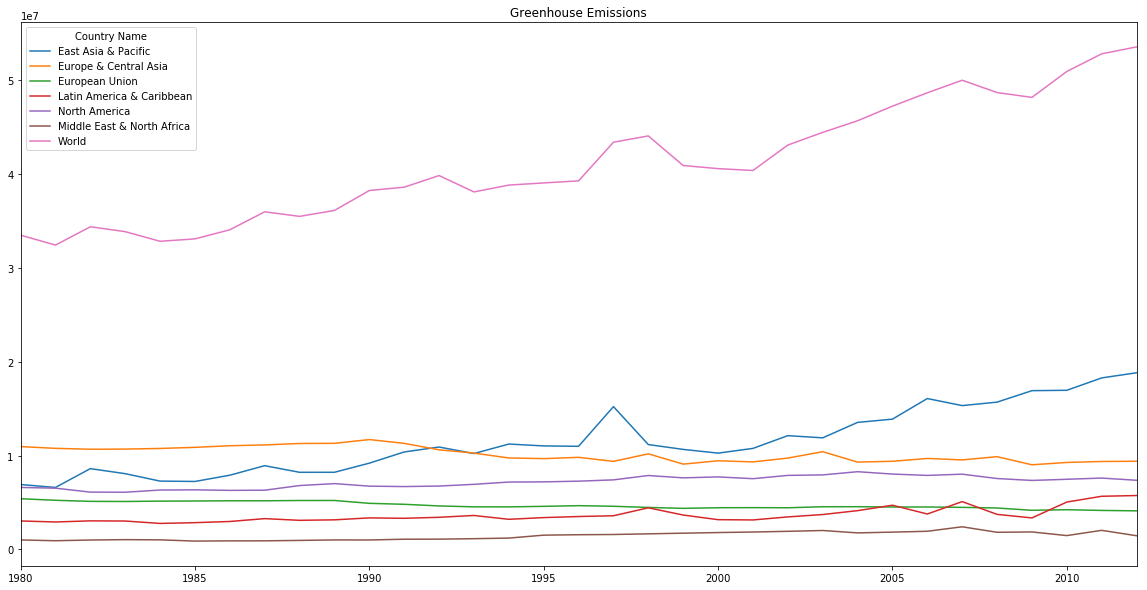

In [14]:
yearly_Emissions = Emissions_df.T
yearly_Emissions.head()

yearly_Emissions.plot(figsize=(20, 10), title="Greenhouse Emissions")

In [9]:
Emissions_pct_change = yearly_Emissions.pct_change(fill_method='ffill')
Emissions_pct_change.head()

Country Name,East Asia & Pacific,Europe & Central Asia,European Union,Latin America & Caribbean,North America,Middle East & North Africa,World
1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,-0.044874,-0.017364,-0.030593,-0.036643,-0.011816,-0.083007,-0.031729
1982,0.303143,-0.008821,-0.022027,0.041125,-0.064174,0.083625,0.060216
1983,-0.062271,0.001516,-0.002377,-0.005981,-0.002020,0.038500,-0.015067
1984,-0.097977,0.006356,0.007292,-0.084127,0.038135,-0.020541,-0.030405


In [10]:
Emissions_growth = Emissions_pct_change.dropna()
Emissions_growth.head()

Country Name,East Asia & Pacific,Europe & Central Asia,European Union,Latin America & Caribbean,North America,Middle East & North Africa,World
1981,-0.044874,-0.017364,-0.030593,-0.036643,-0.011816,-0.083007,-0.031729
1982,0.303143,-0.008821,-0.022027,0.041125,-0.064174,0.083625,0.060216
1983,-0.062271,0.001516,-0.002377,-0.005981,-0.002020,0.038500,-0.015067
1984,-0.097977,0.006356,0.007292,-0.084127,0.038135,-0.020541,-0.030405
1985,-0.005333,0.010963,0.002829,0.029333,0.003594,-0.129118,0.007850


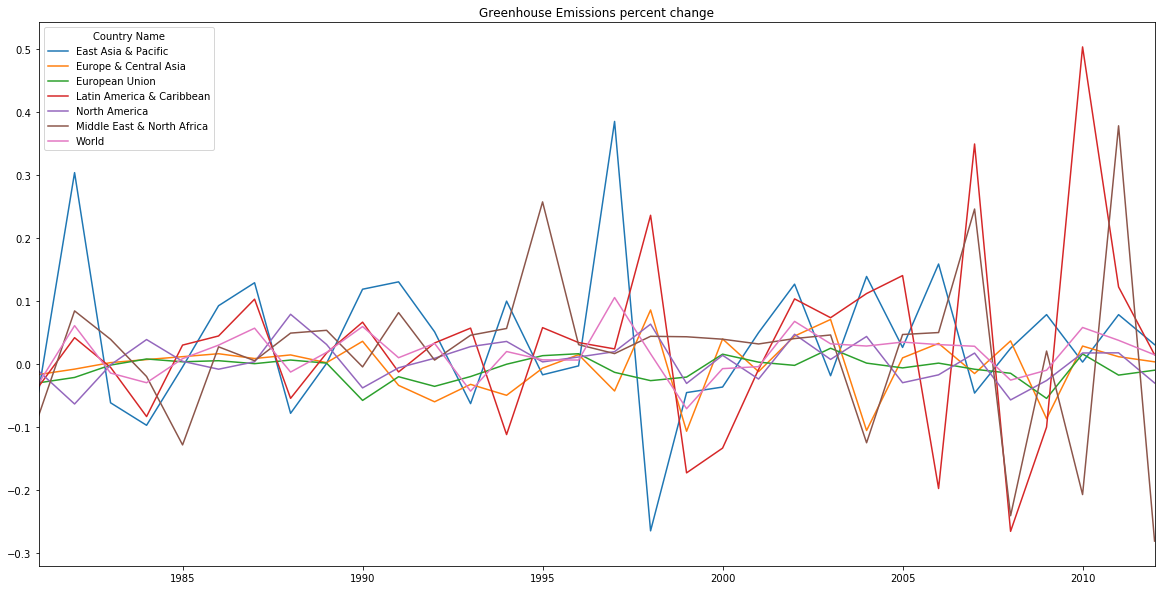

In [11]:
Emissions_growth.plot(figsize=(20, 10), title="Greenhouse Emissions percent change")